In [1]:
from pyautoml import Clean, Preprocess, Feature, Model
import pandas as pd
%matplotlib inline

train_data = pd.read_csv('data/train.csv')

Loading BokehJS ...

In [2]:
clean = Clean(data=train_data, target_field='Survived', report_name='Titanic')

In [3]:
# clean.data_report(title='Titanic Summary', output_file='titanic_summary.html')

## Cleaning

In [4]:
clean.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,712,712,712,NaN,NaN,567,712,712,NaN,712,NaN,NaN
mean,448.202,0.394663,2.29635,NaN,NaN,29.6299,0.498596,0.384831,NaN,32.908,NaN,NaN
std,259.913,0.489122,0.84066,NaN,NaN,14.742,1.04606,0.804834,NaN,52.3564,NaN,NaN
min,1,0,1,NaN,NaN,0.42,0,0,NaN,0,NaN,NaN
25%,220.75,0,2,NaN,NaN,20.75,0,0,NaN,7.8958,NaN,NaN
50%,453.5,0,3,NaN,NaN,28,0,0,NaN,14.5,NaN,NaN
75%,674.25,1,3,NaN,NaN,38,1,0,NaN,30.5489,NaN,NaN
max,891,1,3,NaN,NaN,80,8,6,NaN,512.329,NaN,NaN
counts,712,712,712,712,712,567,712,712,712,712,168,711
uniques,712,2,3,712,2,87,7,7,566,230,129,3


In [5]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,712,712,712,712,712,567,712,712,712,712,168,711
uniques,712,2,3,712,2,87,7,7,566,230,129,3
missing,0,0,0,0,0,145,0,0,0,0,544,1
missing_perc,0%,0%,0%,0%,0%,20.37%,0%,0%,0%,0%,76.40%,0.14%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


mean                         32.908
std                         52.3564
variance                    2741.19
min                               0
max                         512.329
mode                           8.05
5%                          7.18752
25%                          7.8958
50%                            14.5
75%                         30.5489
95%                             120
iqr                         22.6531
kurtosis                    32.6979
skewness                    4.80696
sum                         23430.5
mad                         29.2603
cv                          1.59099
zeros_num                        14
zeros_perc                    1.97%
deviating_of_mean                18
deviating_of_mean_perc        2.53%
deviating_of_median              47
deviating_of_median_perc      6.60%
top_correlations                   
counts                          712
uniques                         230
missing                           0
missing_perc                

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


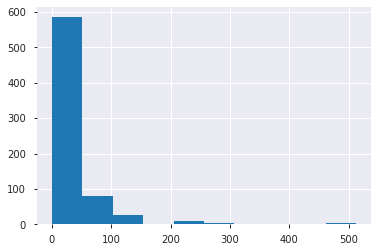

In [6]:
clean.describe_column('Fare')

32.90798693820225

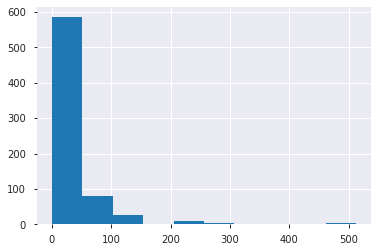

In [7]:
clean.describe_column('Fare')['mean']

In [8]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,544.000000,145.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.764045,0.203652,0.001404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,143.000000,32.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.798883,0.178771,0.005587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
iter1 = clean.replace_missing_mostcommon('Fare', 'Embarked')

In [10]:
iter1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.00,1,1,29750,NaN,39,S
1,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,NaN,10.5,S
2,591,0,3,"Rintamaki, Mr. Matti",male,35.00,0,0,STON/O 2. 3101273,NaN,7.125,S
3,80,1,3,"Dowdell, Miss. Elizabeth",female,30.00,0,0,364516,NaN,12.475,S
4,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,NaN,19.2583,C


In [11]:
iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,544.000000,145.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.764045,0.203652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,143.000000,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.798883,0.178771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


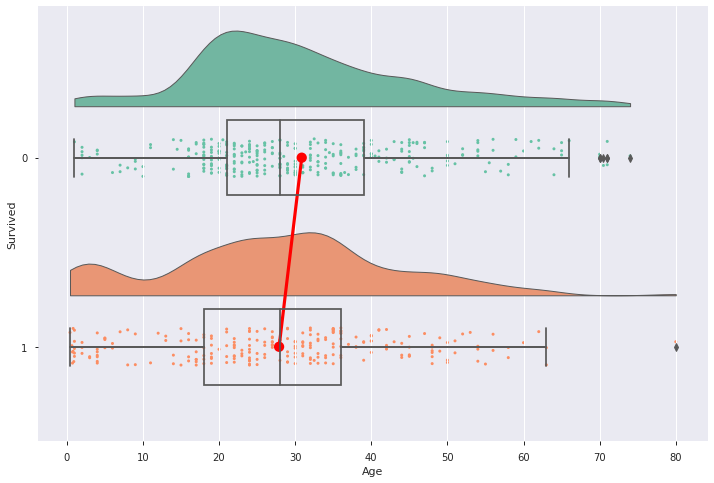

In [12]:
clean.visualize_raincloud('Age')

In [13]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,544.000000,145.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.764045,0.203652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,143.000000,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.798883,0.178771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
clean.replace_missing_random_discrete('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.00,1,1,29750,NaN,39,S
1,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,NaN,10.5,S
2,591,0,3,"Rintamaki, Mr. Matti",male,35.00,0,0,STON/O 2. 3101273,NaN,7.125,S
3,80,1,3,"Dowdell, Miss. Elizabeth",female,30.00,0,0,364516,NaN,12.475,S
4,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,NaN,19.2583,C


In [15]:
clean.missing_values

,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,544.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.764045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,143.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.798883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
## Proving iter1 is a completely separate instance

iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,544.000000,145.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.764045,0.203652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,143.000000,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.798883,0.178771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
clean.visualize_barplot('Age', 'Survived', groupby='Age', method='mean', xlabel='Age')

In [18]:
clean.drop('Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.00,1,1,29750,39,S
1,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5,S
2,591,0,3,"Rintamaki, Mr. Matti",male,35.00,0,0,STON/O 2. 3101273,7.125,S
3,80,1,3,"Dowdell, Miss. Elizabeth",female,30.00,0,0,364516,12.475,S
4,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C


In [19]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
counts,712,712,712,712,712,712,712,712,712,712,712
uniques,712,2,3,712,2,87,7,7,566,230,3
missing,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,categorical,categorical


In [20]:
clean.visualize_scatterplot('Age', 'Fare', fill_color='yellow')

## Feature Engineering

In [21]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Nobel",
                    "Don":        "Nobel",
                    "Sir" :       "Nobel",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Nobel",
                    "Dona":       "Nobel",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Nobel"
                    } 

feature = Feature(clean)

In [22]:
feature.apply(lambda x: Title_Dictionary[x['Name'].split(',')[1].split('.')[0].strip()], 'Title')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.00,1,1,29750,39.0000,S,Mrs
1,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,S,Mr
2,591,0,3,"Rintamaki, Mr. Matti",male,35.00,0,0,STON/O 2. 3101273,7.1250,S,Mr
3,80,1,3,"Dowdell, Miss. Elizabeth",female,30.00,0,0,364516,12.4750,S,Miss
4,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C,Miss


In [23]:
feature['FamilySize'] = ( feature['SibSp'] + feature['Parch'],
                         feature.test_data['SibSp'] + feature.test_data['SibSp'] )

In [24]:
feature

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.00,1,1,29750,39.0000,S,Mrs,2
1,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,S,Mr,0
2,591,0,3,"Rintamaki, Mr. Matti",male,35.00,0,0,STON/O 2. 3101273,7.1250,S,Mr,0
3,80,1,3,"Dowdell, Miss. Elizabeth",female,30.00,0,0,364516,12.4750,S,Miss,0
4,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C,Miss,3


In [25]:
## Can still do apply and it will apply to both train and test dataset.

def get_person(passenger):
    age = passenger['Age']
    sex = passenger['Sex']
    return 'child' if age < 16 else sex

feature.apply(get_person, 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.00,1,1,29750,39.0000,S,Mrs,2,female
1,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,S,Mr,0,male
2,591,0,3,"Rintamaki, Mr. Matti",male,35.00,0,0,STON/O 2. 3101273,7.1250,S,Mr,0,male
3,80,1,3,"Dowdell, Miss. Elizabeth",female,30.00,0,0,364516,12.4750,S,Miss,0,female
4,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C,Miss,3,child


In [26]:
## Can still do lambda.

feature.apply(lambda x: 'child' if x['Age'] < 16 else x['Sex'], 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.00,1,1,29750,39.0000,S,Mrs,2,female
1,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,S,Mr,0,male
2,591,0,3,"Rintamaki, Mr. Matti",male,35.00,0,0,STON/O 2. 3101273,7.1250,S,Mr,0,male
3,80,1,3,"Dowdell, Miss. Elizabeth",female,30.00,0,0,364516,12.4750,S,Miss,0,female
4,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C,Miss,3,child


In [27]:
feature.drop('Name', 'Ticket', 'SibSp', 'Parch', 'Sex', 'PassengerId')

,Survived,Pclass,Age,Fare,Embarked,Title,FamilySize,Person
0,1,2,40.00,39.0000,S,Mrs,2,female
1,0,2,66.00,10.5000,S,Mr,0,male
2,0,3,35.00,7.1250,S,Mr,0,male
3,1,3,30.00,12.4750,S,Miss,0,female
4,1,3,0.75,19.2583,C,Miss,3,child


In [28]:
feature.onehot_encode('Person', 'Embarked', 'Title', 'Pclass', keep_col=False)

,Survived,Age,Fare,FamilySize,Person_child,Person_female,Person_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Nobel,Title_Officer,Pclass_1,Pclass_2,Pclass_3
0,1,40.00,39.0000,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,66.00,10.5000,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,35.00,7.1250,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,30.00,12.4750,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0.75,19.2583,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Modelling

In [29]:
model = Model(feature)

In [30]:
model.logistic_regression()

Target Data does not exist. Please check if target field is set and then recreate the object.


/home/sidha62/.virtualenvs/pyautoml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sidha62/.virtualenvs/pyautoml/lib/python3.6/site-packages/shap/explainers/linear.py:49: UserWarning: The default value for feature_dependence has been changed to "independent"!
  warnings.warn('The default value for feature_dependence has been changed to "independent"!')


In [31]:
model.list_models()

######## QUEUED MODELS ########
No queued models.

######### RAN MODELS ##########
log_reg


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


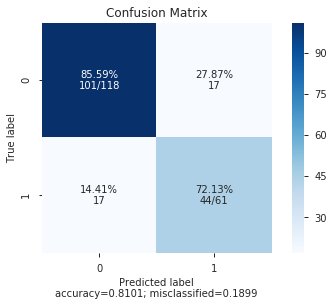

In [32]:
model.log_reg.confusion_matrix(hide_counts=False)

In [33]:
model.log_reg.roc_curve()

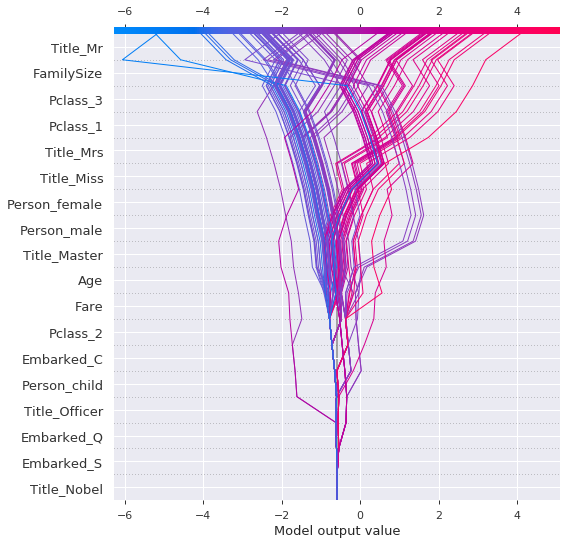

In [37]:
r = model.log_reg.decision_plot(0.5)